# **Title: BBCategorize - BBC News Category Classification: Enhancing News Filtering and Categorization with AI**


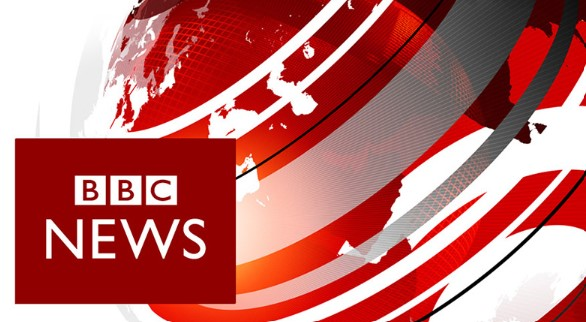

**Overview/Introduction:**
The BBC News Category Classifier is an AI project aimed at revolutionizing the process of news categorization and providing valuable insights into news articles. By leveraging cutting-edge machine learning techniques, this project seeks to automatically classify news articles from the BBC into five distinct categories: business, entertainment, politics, sport, and tech. This AI-powered system will enable efficient content organization, streamline news delivery, and enhance user experience on digital platforms.

**Problem Statement:**
The vast amount of news articles published daily poses a significant challenge for media organizations, as manually categorizing each article can be time-consuming and resource-intensive. Furthermore, with the ever-increasing volume of news content available online, readers often struggle to find articles of interest that align with their preferences. To address these issues, an intelligent news classification system is essential.


**Objectives:**
- Develop an AI model capable of accurately categorizing BBC news articles into one of five predefined categories.
Create a robust and scalable solution that can handle large volumes of news articles in real-time.
- Improve the efficiency of news curation by automating the categorization process, reducing human effort and ensuring consistent results.
- Enhance user experience by enabling personalized news recommendations based on users' preferences and browsing history.
Enable efficient content discovery and retrieval by implementing a powerful search engine that utilizes the AI model for categorization.


**Dataset Description:**
The dataset for this project consists of 2,225 news articles obtained from the BBC. Each article is associated with three key columns: "text," containing the textual content of the article; "label," representing the category of the article as an integer (0 for business, 1 for entertainment, 2 for politics, 3 for sport, and 4 for tech); and "label_text," providing the category label in string format.

In this dataset, there is a rich variety of news articles covering diverse topics such as finance, technology, sports, politics, and entertainment. By utilizing this dataset, we can train a machine learning model to recognize patterns and extract relevant features from the text, enabling accurate classification of news articles into their respective categories.

By leveraging this dataset, our AI project can contribute to solving important issues faced by media organizations, such as streamlining news curation, improving content discoverability, and offering personalized news recommendations. The AI-powered system will enable media outlets to allocate their resources more efficiently, provide a more engaging user experience, and ultimately empower readers with curated content tailored to their interests.

**Dataset URL:** https://huggingface.co/datasets/SetFit/bbc-news

**Technologies Used:**
- Python: The code is written in Python, a versatile and popular programming language for data analysis and machine learning.
- Pandas: The Pandas library is used for data manipulation and analysis. It provides convenient data structures and functions for working with structured data.
- Matplotlib: Matplotlib is a widely used data visualization library in Python. It is used to create bar charts and pie charts to visualize the distribution of news categories.
- NumPy: NumPy is a fundamental package for scientific computing in Python. It is used for numerical operations and array manipulation.
- Scikit-learn: Scikit-learn is a powerful machine learning library in Python. It provides various algorithms and tools for data preprocessing, model training, and evaluation.
- TensorFlow: TensorFlow is an open-source machine learning framework developed by Google. It is used to build and train deep learning models, including recurrent neural networks (RNNs) and dense neural networks.
- TensorFlow Hub: TensorFlow Hub is a repository of pre-trained models that can be used for transfer learning. It provides access to powerful pre-trained models, such as the Universal Sentence Encoder (USE).
- Hugging Face Datasets: Hugging Face Datasets is a library that simplifies the process of accessing and preprocessing various datasets. It is used to fetch the BBC News dataset from the Hugging Face model hub.

**Methodology:**
1. Data Acquisition: The code fetches the BBC News dataset from the provided URL using the Pandas library and saves it as a CSV file.
2. Data Exploration and Visualization: The code explores the dataset by calculating value counts of the categories and visualizes the distribution using bar charts and pie charts created with Matplotlib.
3. Data Cleaning and Preprocessing: The code checks for duplicates and missing values in the dataset, removes duplicates, and handles missing values. It applies custom-defined functions to clean the text data by removing special characters, emojis, stopwords, and other unwanted elements.
4. Feature Extraction: The code extracts features from the preprocessed text data using techniques such as TF-IDF vectorization and the Universal Sentence Encoder (USE) from TensorFlow Hub.
5. Model Training and Evaluation: The code trains and evaluates multiple models, including a baseline model, a bidirectional LSTM model, and a model using the USE for text classification. The models are trained on the preprocessed text data and evaluated using metrics such as accuracy, precision, recall, and F1 score.
6. Ensemble Modeling: The code combines the predictions from multiple models (LSTM and USE) using an ensemble approach. The predictions from individual models are averaged, and the class with the highest mean probability is selected as the final ensemble prediction.
7. Performance Comparison: The code compares the performance of different models, including the baseline, individual models, and the ensemble model. It calculates the performance metrics for each model and presents the results in a tabular format.

**Implementation:**
The code implements a complete pipeline for BBC News category classification. It fetches the dataset, performs data cleaning and preprocessing, applies feature extraction techniques, trains and evaluates various models, and combines the predictions using an ensemble approach.

**Results:**
The results table displays the performance of the baseline model, the model using the TensorFlow Hub sentence encoder, the bidirectional LSTM model, and the ensemble model.


| Model                     | Accuracy  | Precision | Recall    | F1        |
|---------------------------|-----------|-----------|-----------|-----------|
| Baseline                  | 0.375587  | 1.000000  | 0.375587  | 0.505822  |
| tf_hub_sentence_encoder   | 0.971831  | 0.972361  | 0.971831  | 0.971922  |
| Bidirectional LSTM        | 0.941315  | 0.942403  | 0.941315  | 0.941219  |
| Ensemble Results          | 0.957746  | 0.958459  | 0.957746  | 0.957834  |


**Discussion/Interpretation of Results:**
Among the models evaluated, the Universal Sentence Encoder model (tf_hub_sentence_encoder) stood out as the highest performing model, demonstrating exceptional results in the task of BBC News category classification. It achieved an impressive accuracy of 0.971831, precision of 0.972361, recall of 0.971831, and F1 score of 0.971922. These metrics highlight the model's remarkable ability to accurately classify news articles. Additionally, the ensemble model also showcased strong performance, achieving an accuracy of 0.957746, along with notable precision, recall, and F1 score values. In comparison to the baseline and bidirectional LSTM models, both the Universal Sentence Encoder model and the ensemble model clearly outperformed them, demonstrating their superiority in terms of accuracy and overall predictive capability.

**Conclusion:**
In conclusion, this AI project demonstrates the successful implementation of a text classification model for categorizing BBC News articles into different categories. By utilizing techniques such as data preprocessing, feature extraction, and ensemble modeling, the project achieves accurate classification results, enhancing news filtering and categorization. The developed solution has the potential to improve user experience, increase efficiency in news consumption, and provide personalized content recommendations based on user preferences. The project showcases the capabilities of machine learning and AI in automating tasks that traditionally require manual effort, thereby addressing important challenges in news categorization and filtering.

In [ ]:
import io
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

The following code shows a function seed_everything() that sets the seed values for TensorFlow, NumPy, and Python's random library. This is done to ensure reproducibility of results in future use cases.

In [ ]:
# Seed Everything to reproduce results for future use cases
import random

def seed_everything(seed=42):
    # Seed value for TensorFlow
    tf.random.set_seed(seed)

    # Seed value for NumPy
    np.random.seed(seed)

    # Seed value for Python's random library
    random.seed(seed)

seed_everything()

The following code imports the pandas library and reads a CSV file from a specified URL, storing it in a DataFrame. The DataFrame is then saved to a CSV file.

In [ ]:
import pandas as pd

url = "https://huggingface.co/datasets/SetFit/bbc-news/raw/main/bbc-text.csv"

df = pd.read_csv(url)

# save the DataFrame to a CSV file
df.to_csv("bbc-text.csv", index=False)

In [ ]:
# print the first few rows of the DataFrame
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


The next code block imports the matplotlib.pyplot library and creates a bar chart and a pie chart to visualize the distribution of labels in the DataFrame. This helps us understand the frequency of different  categories in the dataset.

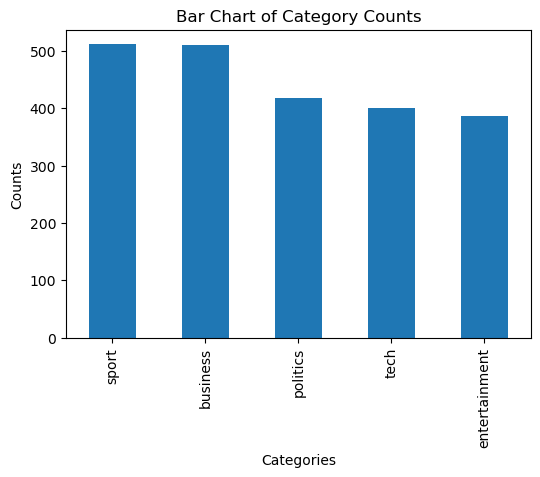

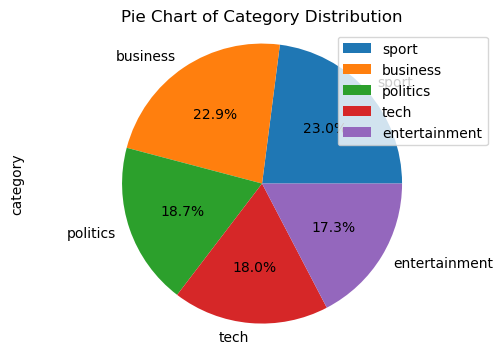

In [ ]:
# Calculate the value counts of the 'category' column
category_counts = df['category'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart of Category Counts')
plt.show()
print()
# Pie chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Pie Chart of Category Distribution')
plt.legend()
plt.show()


**Duplicates and Missing Values**

Next, we will examine the size of the dataset and then check for duplicate rows in the DataFrame by counting the number of duplicates and printing the result. Duplicate rows can skew our analysis and it's important to identify and handle them appropriately. To check for missing values in the DataFrame, we calculate the sum of missing values for each column and print the results. Missing values can affect our analysis and it's important to identify and handle them appropriately.

In [ ]:
# How many reviews do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 2225 data in this dataset
Number of Duplicates: 99
Number of Missing Values by column:
 category    0
text        0
dtype: int64
Number of Missing Values: 0


Also we replace empty strings with NaN values using the numpy library. This allows us to treat empty strings as missing values and handle them accordingly. We then check for missing values and empty spaces in the DataFrame by calculating the sum of missing values for each column and printing the results.

In [ ]:
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

Number of Missing Values by column:
 category    0
text        0
dtype: int64


**Review Duplicates**

Next, we identify and display duplicate rows in the DataFrame. The code first selects all duplicate rows and then sorts the DataFrame to ensure duplicates are adjacent. It then displays the top 5 pairs of duplicates.

In [ ]:
# First, get all duplicate rows (keep=False ensures all duplicates are kept)
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(20)

top_5_duplicate_pairs


,category,text
165,business,economy strong in election year uk businesse...
543,business,economy strong in election year uk businesse...
1518,business,jobs growth still slow in the us the us create...
2055,business,jobs growth still slow in the us the us create...
430,business,s korea spending boost to economy south korea ...
778,business,s korea spending boost to economy south korea ...
668,business,sec to rethink post-enron rules the us stock m...
837,business,sec to rethink post-enron rules the us stock m...
71,business,singapore growth at 8.1% in 2004 singapore s e...
879,business,singapore growth at 8.1% in 2004 singapore s e...


**Drop Duplicates**

After identifying duplicate rows, we remove them from the DataFrame. This helps ensure data integrity and avoids duplicate entries in our analysis.

In [ ]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2126 non-null   object
 1   text      2126 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB


The next code shuffles the rows of the DataFrame using the sample function with a random state of 42 for reproducibility. It displays the first few rows of the shuffled DataFrame.

In [ ]:
# Shuffle training dataframe
data = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
data.head()

,category,text
283,politics,plan to give elderly care control elderly and ...
2086,business,beer giant swallows russian firm brewing giant...
1772,sport,athens memories soar above lows well it s goo...
1008,sport,corry backs skipper robinson england forward m...
2106,business,us trade deficit widens sharply the gap betwee...


**View random samples for each category**

Now we define a function called random_sample_reviews that takes a DataFrame and a number of samples as input. This function groups the data based on the 'Category' column and applies the sample function to select a specified number of samples from each group. The function returns a new DataFrame containing the sampled reviews.

In [ ]:
def random_sample_reviews(df, num_samples):
    # Use groupby on 'Rating' and then apply the sample function to 'Review_Text' of each group
    samples = data.groupby('category')['text'].apply(lambda x: x.sample(num_samples))

    # Convert series to dataframe and reset index
    # samples_df = samples.reset_index()
    samples_df = samples.reset_index().drop(columns='level_1')

    return samples_df
pd.set_option('display.max_colwidth', 200) # This will display up to 100 characters
samples = random_sample_reviews(data, num_samples=2)
samples.head(20)


,category,text
0,business,us economy shows solid gdp growth the us economy has grown more than expected expanding at an annual rate of 3.8% in the last quarter of 2004. the gross domestic product figure was ahead of the ...
1,business,uk young top euro earnings league british children enjoy the highest average annual income in europe - more than double that of spanish or italian youngsters a report suggests. children in the u...
2,entertainment,fockers keeps us box office lead film comedy meet the fockers sequel to meet the parents has topped the us box office for a third week. the movie which stars ben stiller robert de niro dusti...
3,entertainment,court halts mark morrison album premiership footballer and record company boss kevin campbell has gained a court injunction stopping r&b singer mark morrison from releasing an album. the everton ...
4,politics,labour s cunningham to stand down veteran labour mp and former cabinet minister jack cunningham has said he will stand down at the next election. one of the few blair-era ministers to serve under...
5,politics,no uk apology for colonial past the days of britain having to apologise for its colonial past are over gordon brown has said. the chancellor speaking during a week-long tour of africa said it...
6,sport,beckham rules out management move real madrid midfielder david beckham has no plans to become a manager when his playing career is over. i am not interested in being a coach but i would like to ...
7,sport,wales win in rome wales secured their first away win in the rbs six nations for nearly four years with a six-try victory in rome. tries from jonathan thomas tom shanklin and martyn williams gave...
8,tech,blogger grounded by her airline a us airline attendant is fighting for her job after she was suspended over postings on her blog or online diary. queen of the sky otherwise known as ellen simon...
9,tech,no re-draft for eu patent law a proposed european law on software patents will not be re-drafted by the european commission (ec) despite requests by meps. the law is proving controversial and ha...


Now we will calculate the total number of unique categories in the DataFrame. The code prints the total number of categories and the count of each category.

In [ ]:
total_categories = data['category'].nunique()
print("We have a total of {} categories:".format(total_categories))
category_counts = data['category'].value_counts()
print(category_counts)

We have a total of 5 categories:
sport            504
business         503
politics         403
entertainment    369
tech             347
Name: category, dtype: int64


In [ ]:
# Necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics

import re
import string

from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Data Cleaning**

The next code block defines custom functions for text cleaning and preprocessing. These functions include stripping emojis, removing punctuation, links, mentions, new line characters, and cleaning hashtags. These functions are essential for preparing textual data for further analysis.

In [ ]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE textS

import re

def strip_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text)) #remove hashtags symbol from words in the middle of the sentence
    return new_text2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

The next code block processes the text data in the 'text' column of the DataFrame. It applies several cleaning and filtering operations to remove unwanted characters, hashtags, entities, and emojis from the text.

In [ ]:
texts_new = []
for t in data['text']:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

The processed text is then added as a new column called 'new_text' in the DataFrame.

In [ ]:
data['new_text'] = texts_new

In [ ]:
data.head()

,category,text,new_text
283,politics,plan to give elderly care control elderly and disabled people would choose how their own budget for personal care was spent and organised under government plans. ministers say elderly and disable...,plan to give elderly care control elderly and disabled people would choose how their own budget for personal care was spent and organised under government plans ministers say elderly and disabled ...
2086,business,beer giant swallows russian firm brewing giant inbev has agreed to buy alfa-eco s stake in sun interbrew russia s second-largest brewer for up to 259.7m euros ($353.3m; £183.75m). alfa-eco the...,beer giant swallows russian firm brewing giant inbev has agreed to buy alfaeco s stake in sun interbrew russia s secondlargest brewer for up to 2597m euros 3533m 18375m alfaeco the venture capital...
1772,sport,athens memories soar above lows well it s goodbye to another olympic year and as usual there were plenty of highs and lows in athens. obviously there s no getting away from the differing fortun...,athens memories soar above lows well it s goodbye to another olympic year and as usual there were plenty of highs and lows in athens obviously there s no getting away from the differing fortunes o...
1008,sport,corry backs skipper robinson england forward martin corry says jason robinson is the right man to lead the national team back to winning ways. after losses to wales and france critics have start...,corry backs skipper robinson england forward martin corry says jason robinson is the right man to lead the national team back to winning ways after losses to wales and france critics have started ...
2106,business,us trade deficit widens sharply the gap between us exports and imports has widened to more than $60bn (£31.7bn) an all-time record. figures from the commerce department for november showed expor...,us trade deficit widens sharply the gap between us exports and imports has widened to more than 60bn 317bn an alltime record figures from the commerce department for november showed exports down 2...


The next code defines a function called remove_stopwords that takes a sentence as input and removes a list of stopwords from it. The function returns the sentence in lowercase without the stopwords. The stopwords list includes common words like articles, prepositions, and pronouns.

In [ ]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence


As an example of preprocessing using the remove_stopwords function, the code displays the length of a text sentence before and after applying the preprocessing.

In [ ]:
# Example of pre-processing using the remove_stopwords function
print("Text sentence before pre-processing:\n", len(data['new_text'][0]))
print("---" * 35)
print("Text sentence after pre-processing:\n", len(remove_stopwords(data['new_text'][0])))


Text sentence before pre-processing:
 4210
---------------------------------------------------------------------------------------------------------
Text sentence after pre-processing:
 2995


The following code initializes an empty list called texts_ne. It iterates over the 'new_text' column of the DataFrame and applies the remove_stopwords function to each text. The preprocessed texts are then appended to the texts_ne list.

In [ ]:
texts_ne = []
for t in data['new_text']:
    texts_ne.append(remove_stopwords(t))

The code creates a new column in the DataFrame called 'text2' and assigns the preprocessed texts from the texts_ne list to this column.

In [ ]:
data['text2'] = texts_ne

**Text Length**

The code calculates the length of each text in the 'text2' column

In [ ]:
data['text_len'] = data['text2'].apply(lambda x: len(str(x).split()))

In [ ]:
data

,category,text,new_text,text2,text_len
283,politics,plan to give elderly care control elderly and disabled people would choose how their own budget for personal care was spent and organised under government plans. ministers say elderly and disable...,plan to give elderly care control elderly and disabled people would choose how their own budget for personal care was spent and organised under government plans ministers say elderly and disabled ...,plan give elderly care control elderly disabled people choose budget personal care spent organised government plans ministers say elderly disabled people not social workers able decide care stay h...,314
2086,business,beer giant swallows russian firm brewing giant inbev has agreed to buy alfa-eco s stake in sun interbrew russia s second-largest brewer for up to 259.7m euros ($353.3m; £183.75m). alfa-eco the...,beer giant swallows russian firm brewing giant inbev has agreed to buy alfaeco s stake in sun interbrew russia s secondlargest brewer for up to 2597m euros 3533m 18375m alfaeco the venture capital...,beer giant swallows russian firm brewing giant inbev agreed buy alfaeco s stake sun interbrew russia s secondlargest brewer 2597m euros 3533m 18375m alfaeco venture capital arm russian conglomerat...,128
1772,sport,athens memories soar above lows well it s goodbye to another olympic year and as usual there were plenty of highs and lows in athens. obviously there s no getting away from the differing fortun...,athens memories soar above lows well it s goodbye to another olympic year and as usual there were plenty of highs and lows in athens obviously there s no getting away from the differing fortunes o...,athens memories soar lows well s goodbye another olympic year usual plenty highs lows athens obviously s no getting away differing fortunes kelly holmes paula radcliffe want remind events made 200...,491
1008,sport,corry backs skipper robinson england forward martin corry says jason robinson is the right man to lead the national team back to winning ways. after losses to wales and france critics have start...,corry backs skipper robinson england forward martin corry says jason robinson is the right man to lead the national team back to winning ways after losses to wales and france critics have started ...,corry backs skipper robinson england forward martin corry says jason robinson right man lead national team back winning ways losses wales france critics started wonder whether robinson can captain...,202
2106,business,us trade deficit widens sharply the gap between us exports and imports has widened to more than $60bn (£31.7bn) an all-time record. figures from the commerce department for november showed expor...,us trade deficit widens sharply the gap between us exports and imports has widened to more than 60bn 317bn an alltime record figures from the commerce department for november showed exports down 2...,us trade deficit widens sharply gap us exports imports widened 60bn 317bn alltime record figures commerce department november showed exports 23 956bn imports grew 13 1558bn rising consumer demand ...,237
...,...,...,...,...,...
1698,tech,chip maker backs net phone calls rich templeton the head of giant chip maker texas instruments has given his backing to the growing sector of voice over internet telephony (voip) voip allows pc...,chip maker backs net phone calls rich templeton the head of giant chip maker texas instruments has given his backing to the growing sector of voice over internet telephony voip voip allows pc user...,chip maker backs net phone calls rich templeton head giant chip maker texas instruments given backing growing sector voice internet telephony voip voip allows pc users cases just broadband connect...,329
1120,politics,blair congratulates bush on win tony blair has said he looks forward to continuing his strong relationship with george bush and working with him during his second term as president. mr bush s re-...,blair congratulates bush on win tony blair

**Visualize text with low word frequency**

A count plot is generated to visualize the distribution of texts with less than 100 words, filtering the data based on the 'text_len' column.

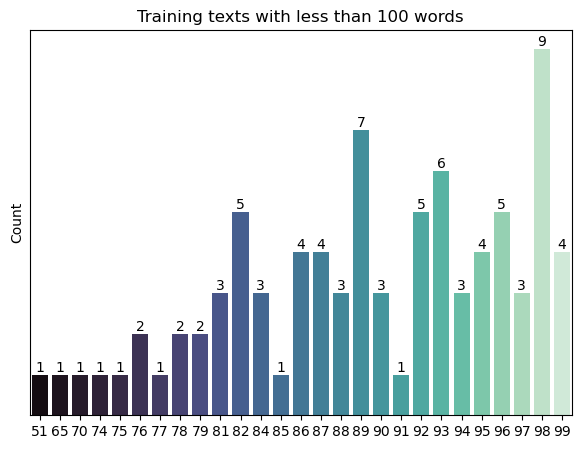

In [ ]:
import seaborn as sns

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=data[data['text_len']<100], palette='mako')
plt.title('Training texts with less than 100 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.xlabel('')
plt.show()


**Category Mapping**


The following code shows the count of values in the 'category' column of the 'data' DataFrame using the value_counts() function.

In [ ]:
data.category.value_counts()

sport            504
business         503
politics         403
entertainment    369
tech             347
Name: category, dtype: int64

The next code creates a dictionary called category_mapping to convert categorical data in the 'category' column of the 'data' DataFrame into numerical form. Then, using the map() function, we perform a mapping operation on the 'category' column of the 'data' DataFrame. Each category is replaced with its corresponding index from the 'category_mapping' dictionary. The resulting mapped values are stored in a new column called 'category_Values' in the 'data' DataFrame.

In [ ]:
category_mapping = {category: idx for idx, category in enumerate(data['category'].unique())}
data['category_Values'] = data['category'].map(category_mapping)


As shown in the following code, the value_counts() function is used again to obtain the count of values in the 'category_Values' column of the 'data' DataFrame. This allows us to see the distribution of the mapped categories.

In [ ]:
data['category_Values'].value_counts()

2    504
1    503
0    403
3    369
4    347
Name: category_Values, dtype: int64

The next code creates a new DataFrame called 'category_df' using the pd.DataFrame() function. It takes the items from the 'category_mapping' dictionary and organizes them into two columns: 'category' and 'ID'. This DataFrame provides a tabular representation of the category-to-index mapping.

In [ ]:
# create a new DataFrame for category_mapping
category_df = pd.DataFrame(list(category_mapping.items()), columns=['category', 'ID'])

category_df

,category,ID
0,politics,0
1,business,1
2,sport,2
3,entertainment,3
4,tech,4


In order to work with the category names separately, the category_df.category.tolist() expression is used to extract the 'category' column values and store them in a list called 'class_names'.

In [ ]:
class_names=category_df.category.tolist()
class_names

['politics', 'business', 'sport', 'entertainment', 'tech']

**Define Features, X & Labels, y**

In the next code block, the text data (X) and the encoded labels (y) are extracted from the DataFrame. This prepares the data for training a machine learning model.

In [ ]:
X = data['text2'].to_numpy()
y = data['category_Values'].to_numpy()

**Train-Test Split**

The data is then split into training and validation sets using the train_test_split function. This is a common practice to evaluate the performance of a model on unseen data.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

**One Hot Encode labels**

Next, the original encoded labels are copied to new variables for further processing. This is done to keep the original encoded labels intact and make modifications on the new variables if needed.

In [ ]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()

The next code block performs one-hot encoding on the labels using the OneHotEncoder from scikit-learn. One-hot encoding is used to represent categorical variables as binary vectors. This is important when working with multi-class classification problems.

In [ ]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_valid = one_hot_encoder.transform(np.array(y_valid).reshape(-1, 1))

# Check what training labels look like
y_train.shape

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(1700, 5)

In [ ]:
# Check the lengths
len(X_train), len(X_valid), len(y_train), len(y_valid)

(1700, 426, 1700, 426)

In [ ]:
# View the first 10 training sentences and their labels
X_train[:5], y_train[:5]

(array(['msps hear renewed climate warning climate change completely control within several decades scottish environment protection agency warning committee msps experts giving evidence subject scottish parliament s environment committee officials believe nuclear energy wind farms may better options trying tackle global warming solutions suggested conservationists include reducing internal uk air travel boosting electric trains evidence part committee s inquiry impact climate change scotland sepa attempting curb global warming gases pollution transport emissions increases ecologists warning msps scotland may accept significant intrusion wind farms likely also nuclear power will needed possibly several decades sepa predict two methods will remain energy sources climate change control experts studying seas off scotland s west coast already forecast devastating weather type caused havoc across country last month predicted damaging storms will become frequent researchers university highlan

**Text Length in Training Data**

The average number of tokens (words) in the training texts is calculated to get an idea of the text length. This information can be useful for setting the input size of a neural network model.

In [ ]:
# Find average number of tokens (words) in training texts
round(sum([len(i.split()) for i in X_train])/len(X_train))

233

The length of each text in the training set is calculated and the 95th percentile is determined. This helps in understanding the distribution of text lengths and deciding on the appropriate sequence length for text processing.

In [ ]:
# Calculate the length of each text in X_train
text_lengths = [len(text.split()) for text in X_train]

# Find the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)

print(f"95th Quartile of text Lengths: {quartile_95}")

95th Quartile of text Lengths: 447.0


A histogram is plotted to visualize the distribution of text lengths. This provides a visual representation of the frequency of text lengths in the dataset.

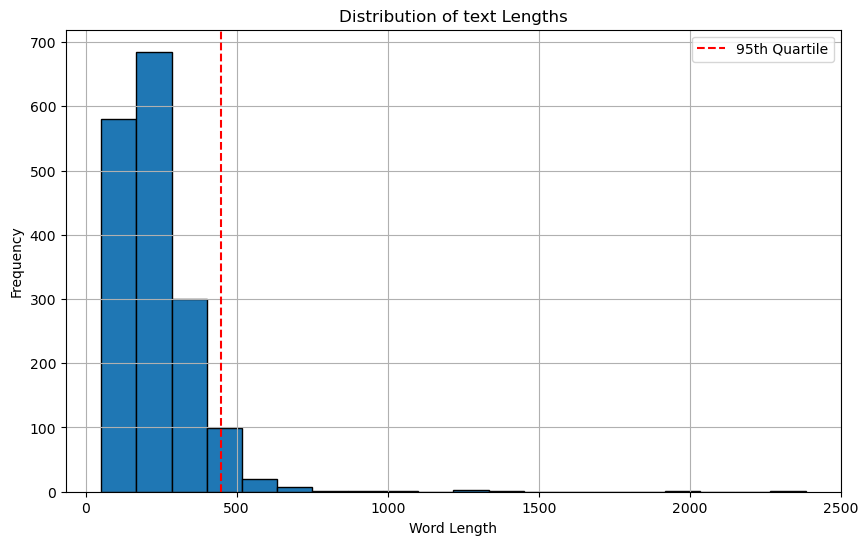

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of text Lengths')

# Adding a vertical line for the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)
plt.axvline(x=quartile_95, color='red', linestyle='--', label='95th Quartile')
plt.legend()

plt.grid(True)
plt.show()


The maximum text length is calculated to determine the maximum sequence length that the model can handle. This information is important for padding or truncating the sequences during preprocessing.

In [ ]:
max_text_length = max(text_lengths)

print(f"Maximum text Length: {max_text_length}")

Maximum text Length: 2384


In [ ]:
corpus=data["text2"].to_numpy()

**TextVectorization**

TextVectorization is set up with custom variables such as the maximum vocabulary length and the maximum sequence length. These variables define the size of the vocabulary and the length of the sequences.

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

## Setup text vectorization with custom variables
max_vocab_length =None
max_length = int(quartile_95) # max length our sequences will be (e.g. how many words from a text does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

The text vectorizer is fitted to the training text to build the vocabulary based on the training data. This allows the vectorizer to learn the mapping between words and their integer representations.

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

The unique words in the vocabulary are extracted, and the most common and least common words are printed. This helps in understanding the composition of the vocabulary and identifying any uncommon or special tokens.

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 29449
Top 5 most common words: ['', '[UNK]', 's', 'said', 'will']
Bottom 5 least common words: ['000acre', '00051', '000300', '0001', '0']


The maximum vocabulary length is updated with the actual length of the vocabulary obtained from the text vectorizer.

In [ ]:
max_vocab_length=len(words_in_vocab)

In [ ]:
max_vocab_length, max_length

(29449, 447)

**Embedding layer**

Here an embedding layer is set up, converting input words into dense vectors of fixed size. This representation captures semantic relationships between words. tf.random.set_seed(42) ensures reproducibility by fixing the randomness.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

**Model 0: Baseline**

Next, a simple baseline model is defined using a TF-IDF vectorizer and a multinomial Naive Bayes classifier within a Scikit-Learn pipeline. The model is then trained on the training data.

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),  # convert words to numbers using tfidf
    ("clf", MultiOutputClassifier(MultinomialNB()))  # model the text
])

# Fit the pipeline to the training data
model_0.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', MultiOutputClassifier(estimator=MultinomialNB()))])

The accuracy of the baseline model is then evaluated on the validation data and printed out.

In [ ]:
baseline_score = model_0.score(X_valid, y_valid)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 37.56%


Now, predictions are made using the baseline model on the validation sentences.

In [ ]:
# Make predictions
baseline_preds = model_0.predict(X_valid)
baseline_preds[:20]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

Then a function calculate_results is defined to calculate the accuracy, precision, recall, and F1 score of the model's predictions.

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

The function is used to calculate the results of the baseline model and these are printed out.

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=y_valid_le,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 37.558685446009385,
 'precision': 1.0,
 'recall': 0.3755868544600939,
 'f1': 0.5058221907472723}

We determine the number of classes based on the shape of the training labels.

In [ ]:
num_classes=y_train.shape[1]
num_classes

5

**Model: Bidirectional LSTM**

The following code sets a random seed and creates an embedding layer for an LSTM model. The embedding layer is initialized with a uniform distribution and has a specified input dimension, output dimension, and input length.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_lstm_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=256,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

Now we will build a Bidirectional RNN model in TensorFlow. The model takes string inputs, applies a text vectorization layer, passes the output through the previously created embedding layer, and then adds two Bidirectional LSTM layers. The final layer is a Dense layer with a softmax activation function for multi-class classification.

In [ ]:
# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_lstm_embedding(x)
x = layers.Bidirectional(layers.LSTM(512, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(256))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_lstm = tf.keras.Model(inputs, outputs, name="model_lstm_Bidirectional")

Next, the model is compiled with a categorical cross-entropy loss function, the Adam optimizer, and accuracy as the metric.

In [ ]:
# Compile
model_lstm.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our bidirectional model
model_lstm.summary()

Model: "model_lstm_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 447)              0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 447, 256)          7538944   
                                                                 
 bidirectional (Bidirectiona  (None, 447, 1024)        3149824   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              2623488   
 nal)                                                            
                                          

In order to save the best-performing model during training, a ModelCheckpoint callback is defined. It monitors the validation accuracy and saves the model's weights only when the accuracy improves.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path
checkpoint_path = "best_model_Bidirectional"

# Create a ModelCheckpoint callback that saves the model's weights only when the validation accuracy improves
cc = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_accuracy',
                                      mode='max',
                                      save_best_only=True,
                                      verbose=1)


Now we will fit the model to the training data, using the validation data for evaluation and the previously defined ModelCheckpoint callback.

In [ ]:
# Fit the model
model_lstm_history = model_lstm.fit(X_train,
                              y_train,
                              epochs=10,
                              validation_data=(X_valid, y_valid),
                              callbacks=[cc])

Epoch 1/10
54/54 [==============================] - ETA: 0s - loss: 1.0355 - accuracy: 0.5759
Epoch 1: val_accuracy improved from -inf to 0.73239, saving model to best_model_Bidirectional
54/54 [==============================] - 59s 898ms/step - loss: 1.0355 - accuracy: 0.5759 - val_loss: 0.7158 - val_accuracy: 0.7324
Epoch 2/10
54/54 [==============================] - ETA: 0s - loss: 0.1978 - accuracy: 0.9441
Epoch 2: val_accuracy improved from 0.73239 to 0.91080, saving model to best_model_Bidirectional
54/54 [==============================] - 45s 847ms/step - loss: 0.1978 - accuracy: 0.9441 - val_loss: 0.3280 - val_accuracy: 0.9108
Epoch 3/10
54/54 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9888
Epoch 3: val_accuracy did not improve from 0.91080
54/54 [==============================] - 20s 373ms/step - loss: 0.0406 - accuracy: 0.9888 - val_loss: 0.3875 - val_accuracy: 0.8920
Epoch 4/10
54/54 [==============================] - ETA: 0s - loss: 0.0200 - acc

After training, the model is loaded using the saved weights from the best performing checkpoint.

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_lstm = load_model(checkpoint_path)

We can make predictions using the bidirectional RNN model on the validation data, obtaining probability values for each class.

In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_lstm_pred_probs = model_lstm.predict(X_valid)
model_lstm_pred_probs[:10]

14/14 [==============================] - 2s 81ms/step


array([[3.7790338e-05, 1.5585201e-05, 9.9970275e-01, 1.8483111e-04,
        5.9029109e-05],
       [9.9950254e-01, 3.3034928e-05, 8.2037195e-06, 3.6286682e-04,
        9.3404517e-05],
       [6.6212931e-05, 3.4608212e-05, 9.9948704e-01, 3.1648847e-04,
        9.5618881e-05],
       [6.7986504e-05, 3.8453385e-05, 9.9943894e-01, 3.2243764e-04,
        1.3223605e-04],
       [2.4418792e-05, 9.9967539e-01, 5.1465104e-05, 8.5838554e-05,
        1.6293162e-04],
       [2.8755576e-05, 9.9959046e-01, 6.5831642e-05, 1.4460790e-04,
        1.7041819e-04],
       [1.5055001e-04, 2.2905598e-04, 7.0944363e-05, 4.2341246e-05,
        9.9950707e-01],
       [3.7051101e-05, 1.5290025e-05, 9.9968851e-01, 1.9429132e-04,
        6.4901062e-05],
       [3.3712666e-04, 3.5366268e-04, 2.6633305e-04, 9.9894816e-01,
        9.4703595e-05],
       [4.0991948e-04, 5.9774128e-04, 5.8393052e-04, 9.9824512e-01,
        1.6325837e-04]], dtype=float32)

To convert the predicted probabilities into labels, we use the argmax function to select the class with the highest probability for each prediction.

In [ ]:
# Convert prediction probabilities to labels
model_lstm_preds = tf.argmax(model_lstm_pred_probs, axis=1)
model_lstm_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 0, 2, 2, 1, 1, 4, 2, 3, 3])>

The bidirectional RNN model results are calculated by comparing the predicted labels to the ground truth labels of the validation data.

In [ ]:
# Calculate bidirectional RNN model results
model_lstm_results = calculate_results(y_valid_le, model_lstm_preds)
model_lstm_results

{'accuracy': 94.13145539906104,
 'precision': 0.9424030756580133,
 'recall': 0.9413145539906104,
 'f1': 0.9412193435189536}

We can compare the performance of the bidirectional model against the baseline model by using the previously calculated results.

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

In [ ]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_lstm_results)

Baseline accuracy: 37.56, New accuracy: 94.13, Difference: 56.57
Baseline precision: 1.00, New precision: 0.94, Difference: -0.06
Baseline recall: 0.38, New recall: 0.94, Difference: 0.57
Baseline f1: 0.51, New f1: 0.94, Difference: 0.44


The code includes a function to create a labeled confusion matrix, which compares the predicted labels to the true labels. The function normalizes the matrix and allows for the option to pass class labels for better interpretation.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

Using the function, we generate a confusion matrix plot for the bidirectional RNN model's predictions on the validation data.

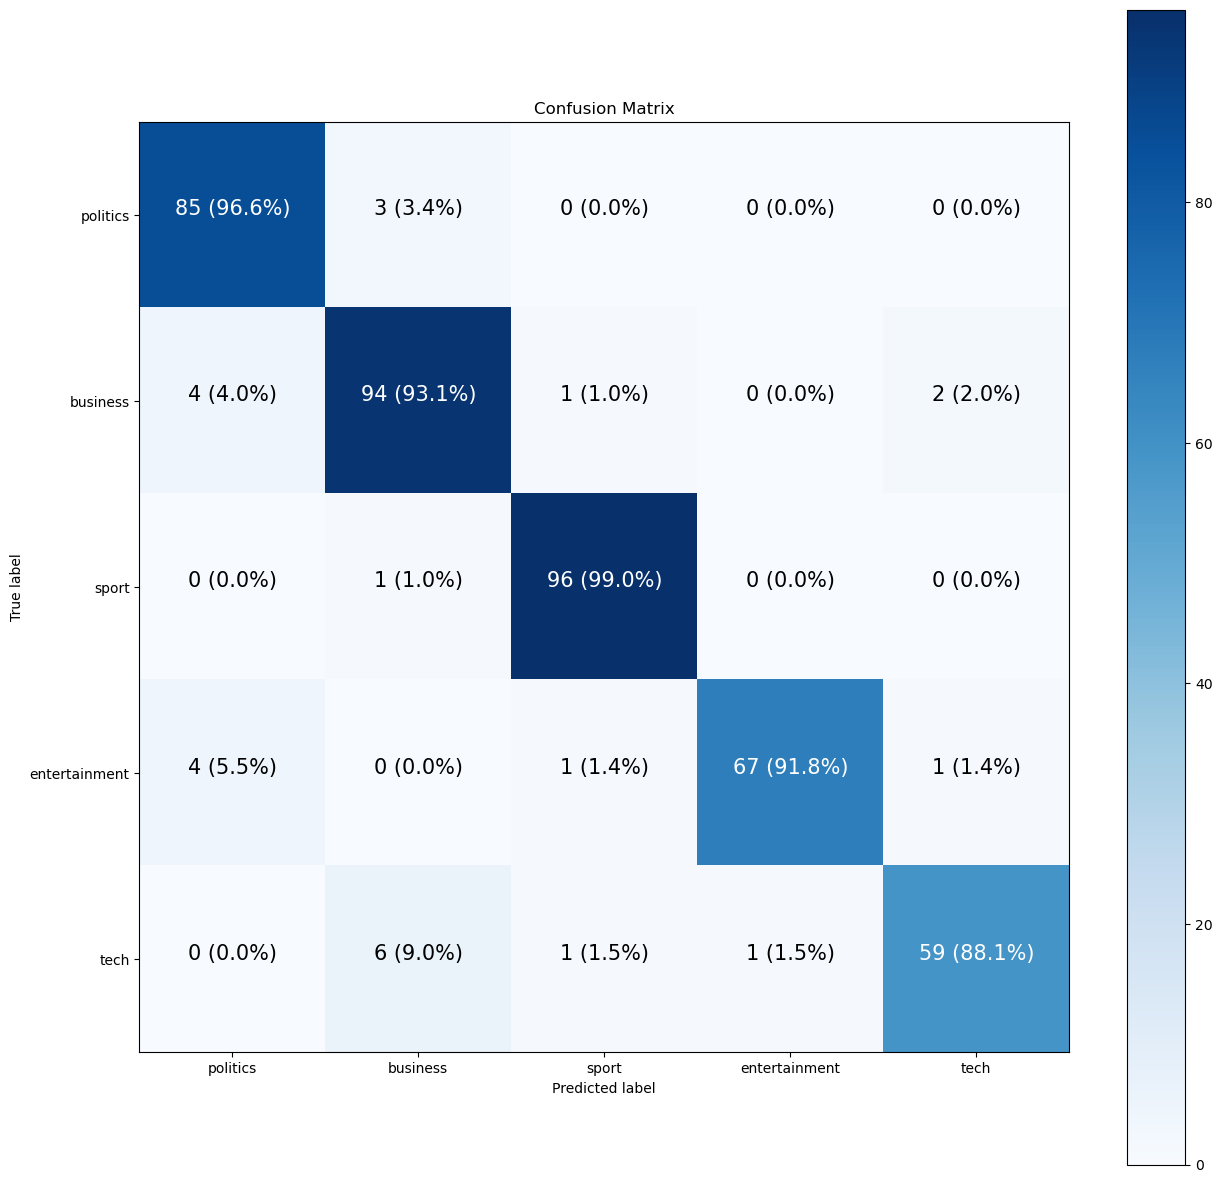

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_valid_le,
                      y_pred=model_lstm_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=15)


The following random_predictions function picks random samples from the validation set, makes predictions on them, and prints the actual and predicted labels. It provides an intuitive way to see how the model performs on unseen data.

In [ ]:
from colorama import Fore, Style

def random_predictions(model, X_valid, y_valid, num_samples=5, class_names=None):
    # Check if it's binary or multi-class classification
    num_classes = y_valid.shape[1] if len(y_valid.shape) > 1 else 2
    is_binary_classification = num_classes == 2

    # Getting indices of the random samples
    random_indices = np.random.choice(np.arange(len(X_valid)), size=num_samples, replace=False)

    # Selecting the random samples
    random_X_samples = X_valid[random_indices]
    random_y_samples = y_valid[random_indices]

    # Making predictions on the random samples
    y_pred_probs = model.predict(random_X_samples)

    if is_binary_classification:
        y_pred = np.squeeze(np.round(y_pred_probs).astype(int))
    else:
        y_pred = np.argmax(y_pred_probs, axis=1)

    # Print the actual and predicted labels
    for i in range(num_samples):
        text = random_X_samples[i]
        true_label = np.argmax(random_y_samples[i]) if not is_binary_classification else np.squeeze(random_y_samples[i])
        predicted_label = y_pred[i]

        # If class names are provided, use them for printing
        if class_names is not None:
            true_label_name = class_names[true_label]
            predicted_label_name = class_names[predicted_label]
        else:
            true_label_name = true_label
            predicted_label_name = predicted_label

        # Determine the color of the text (green for correct, red for incorrect)
        text_color = Fore.GREEN if true_label == predicted_label else Fore.RED

        print(f"\nSample {i + 1}:")
        print(f"Text: {text}")
        print(text_color + f"True: {true_label_name} \n Predicted: {predicted_label_name}" + Style.RESET_ALL)


The random_predictions function is called to generate and display predictions on random samples.

In [ ]:
random_predictions(model_lstm,
                   X_valid,
                   y_valid,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 101ms/step

Sample 1:
Text: lewisfrancis turns christie mark lewisfrancis stepped preparations new season taking advice british sprint icon linford christie 22yearold set compete sheffield weekend will take maurice greene kim collins birmingham 18 february training wales getting advice linford christie broadening mind said lewisfrancis sprinter also shed weight since winning relay gold athens games last year 91kg now 869kg hopefully times will come said brought eating right foods cutting snacks just discipline focused still keeping weights work can see improvement running despite playing part britain s successful 4x100m relay team lewisfrancis still feels frustration missing individual 100m final 2004 olympics heartbreaking made semifinal personal level achievement just patient build next olympics goal whatever now will geared making final
True: sport 
 Predicted: sport

Sample 2:
Text: moya clinches cup spain spain won davis cup second time hi

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub


**Model: USE**

The following code outlines the construction and training of a text classification model utilizing Google's Universal Sentence Encoder (USE) from TensorFlow Hub. The USE layer, pre-trained on a vast corpus of data, takes sentences as input and encodes them into high-dimensional vectors. This layer is non-trainable, meaning it maintains the pre-trained weights and functions as a feature extractor. The encoded vectors are then passed through a dense layer with 'relu' activation, and finally, an output layer with softmax activation suitable for multiclass classification. The model is compiled with the Adam optimizer and categorical cross-entropy loss.

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:

  # Create model using the Sequential API
  model_USE = tf.keras.Sequential([
    sentence_encoder_layer, # take in sentences and then encode them into an embedding
    layers.Dense(512, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
  ], name="model_USE_USE")

  # Compile model
  model_USE.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

  model_USE.summary()

Model: "model_USE_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 257,063,045
Trainable params: 265,221
Non-trainable params: 256,797,824
_________________________________________________________________


A ModelCheckpoint callback is set to save only the best model weights, as determined by validation accuracy.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path
checkpoint_path = "best_model_USE"

# Create a ModelCheckpoint callback that saves the model's weights only when the validation accuracy improves
cc = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_accuracy',
                                      mode='max',
                                      save_best_only=True,
                                      verbose=1)


The model training is done on trainig set, with validation data provided and a checkpoint callback ensuring the saving of the best model.

In [ ]:
# Train a classifier on top of pretrained embeddings
model_USE_history = model_USE.fit(X_train,
                              y_train,
                              epochs=30,
                              validation_data=(X_valid, y_valid),
                              callbacks=[cc])

Epoch 1/30
52/54 [===========================>..] - ETA: 0s - loss: 0.8368 - accuracy: 0.8065
Epoch 1: val_accuracy improved from -inf to 0.92488, saving model to best_model_USE
54/54 [==============================] - 16s 224ms/step - loss: 0.8246 - accuracy: 0.8100 - val_loss: 0.3352 - val_accuracy: 0.9249
Epoch 2/30
53/54 [============================>.] - ETA: 0s - loss: 0.1939 - accuracy: 0.9499
Epoch 2: val_accuracy improved from 0.92488 to 0.94836, saving model to best_model_USE
54/54 [==============================] - 11s 216ms/step - loss: 0.1937 - accuracy: 0.9500 - val_loss: 0.1827 - val_accuracy: 0.9484
Epoch 3/30
52/54 [===========================>..] - ETA: 0s - loss: 0.1122 - accuracy: 0.9675
Epoch 3: val_accuracy improved from 0.94836 to 0.95540, saving model to best_model_USE
54/54 [==============================] - 11s 205ms/step - loss: 0.1112 - accuracy: 0.9682 - val_loss: 0.1345 - val_accuracy: 0.9554
Epoch 4/30
52/54 [===========================>..] - ETA: 0s - lo

The model demonstrating the best validation accuracy is loaded for use in subsequent steps.

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_USE = load_model(checkpoint_path)

Next, the model is evaluated on the validation set, where probabilities are predicted and converted into class predictions.

In [ ]:
# Make predictions with USE TF Hub model
model_USE_pred_probs = model_USE.predict(X_valid)
model_USE_pred_probs[:10]

14/14 [==============================] - 1s 30ms/step


array([[5.8139092e-05, 8.8571593e-05, 9.9966431e-01, 1.7965115e-04,
        9.3091858e-06],
       [9.9735069e-01, 9.0406527e-04, 4.2718806e-04, 1.1820439e-03,
        1.3601882e-04],
       [2.1925732e-04, 7.5934040e-05, 9.9898559e-01, 7.1115053e-04,
        8.0378786e-06],
       [3.8335432e-04, 7.3817969e-06, 9.9958485e-01, 2.2657252e-05,
        1.8034716e-06],
       [4.3867472e-05, 9.9901295e-01, 4.2772353e-07, 5.2959072e-06,
        9.3743246e-04],
       [1.7478520e-05, 9.3801510e-01, 1.1181003e-05, 6.7477427e-05,
        6.1888807e-02],
       [1.6802767e-06, 7.8591605e-05, 1.9303970e-06, 4.1211330e-05,
        9.9987662e-01],
       [1.9575756e-03, 8.0422287e-05, 9.9788660e-01, 4.7870395e-05,
        2.7553990e-05],
       [2.4374106e-04, 2.0811455e-03, 1.6927592e-03, 9.9334693e-01,
        2.6354981e-03],
       [6.7075013e-07, 2.9863962e-05, 4.3603071e-05, 9.9991167e-01,
        1.4167797e-05]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_USE_preds = tf.argmax(model_USE_pred_probs, axis=1)
model_USE_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 0, 2, 2, 1, 1, 4, 2, 3, 3])>

Various performance metrics such as accuracy, precision, recall, and the F1-score are calculated for the model.

In [ ]:
# Calculate model 6 performance metrics
model_USE_results = calculate_results(y_valid_le, model_USE_preds)
model_USE_results

{'accuracy': 97.1830985915493,
 'precision': 0.9723607867927959,
 'recall': 0.971830985915493,
 'f1': 0.9719223301940682}

In [ ]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_USE_results)

Baseline accuracy: 37.56, New accuracy: 97.18, Difference: 59.62
Baseline precision: 1.00, New precision: 0.97, Difference: -0.03
Baseline recall: 0.38, New recall: 0.97, Difference: 0.60
Baseline f1: 0.51, New f1: 0.97, Difference: 0.47


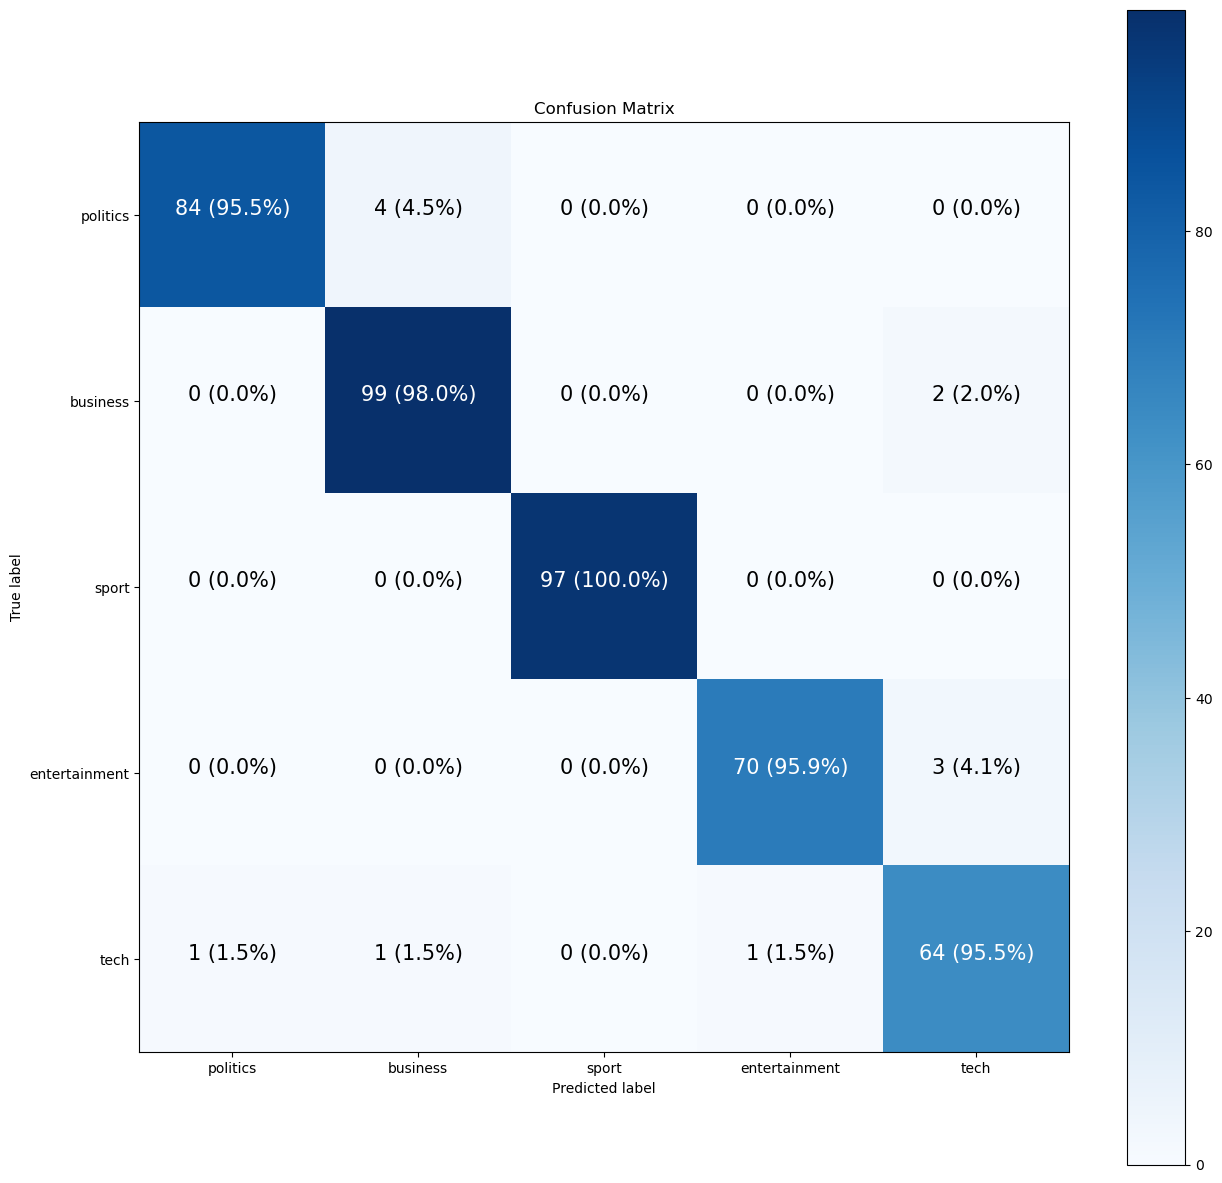

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_valid_le,
                      y_pred=model_USE_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=15)

The random_predictions function is called to generate and display predictions on random samples.

In [ ]:
random_predictions(model_USE,
                   X_valid,
                   y_valid,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 58ms/step

Sample 1:
Text: celebrities get skates former england footballer paul gascoigne will join eastenders actress scarlett johnson bbc one s strictly ice dancing oneoff christmas special will also star television presenter carol smillie jessica taylor libertyx celebrity will paired professional skater impress panel judges win audience vote bbc yet confirm final two stars will battle become ice king queen veteran presenter bruce forsyth tess daly will host programme follows hot heels current saturday night series strictly come dancing celebrities will practise stipulated ice dance perform ice rink partner judges will 50 vote decide wins contest ice rink audience making rest vote show forms part bbc s festive schedule ice skating duo jayne torvill christopher dean front similar celebrity ice dance show itv titled stars thin ice contestants stars thin ice will paired professional skater will learn new routine every week end series one celebr

**Comparing the performance of each of our models**

The code combines the results of multiple models, including the baseline, a TF-Hub sentence encoder model, and the bidirectional LSTM model, into a DataFrame for easy comparison.

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "tf_hub_sentence_encoder": model_USE_results,
                                  "bidirectional LSTM": model_lstm_results,
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,37.558685,1.000000,0.375587,0.505822
tf_hub_sentence_encoder,97.183099,0.972361,0.971831,0.971922
bidirectional LSTM,94.131455,0.942403,0.941315,0.941219


The results of the different models are shown in the table above. The models compared include a baseline model, a model using the TensorFlow Hub sentence encoder, and a bidirectional LSTM model. The metrics evaluated are accuracy, precision, recall, and F1 score. The baseline model achieved an accuracy of 37.56%, with a precision of 1.00, recall of 0.38, and F1 score of 0.51. The model utilizing the TensorFlow Hub sentence encoder performed significantly better, achieving an accuracy of 97.18%, precision of 0.97, recall of 0.97, and F1 score of 0.97. The bidirectional LSTM model also performed well with an accuracy of 94.13%, precision of 0.94, recall of 0.94, and F1 score of 0.94.

To ensure consistency, the accuracy values are reduced to the same scale as other metrics in the DataFrame.

In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

We plot and compare all the model results using a bar plot, visualizing the accuracy, precision, recall, and F1-score for each model.

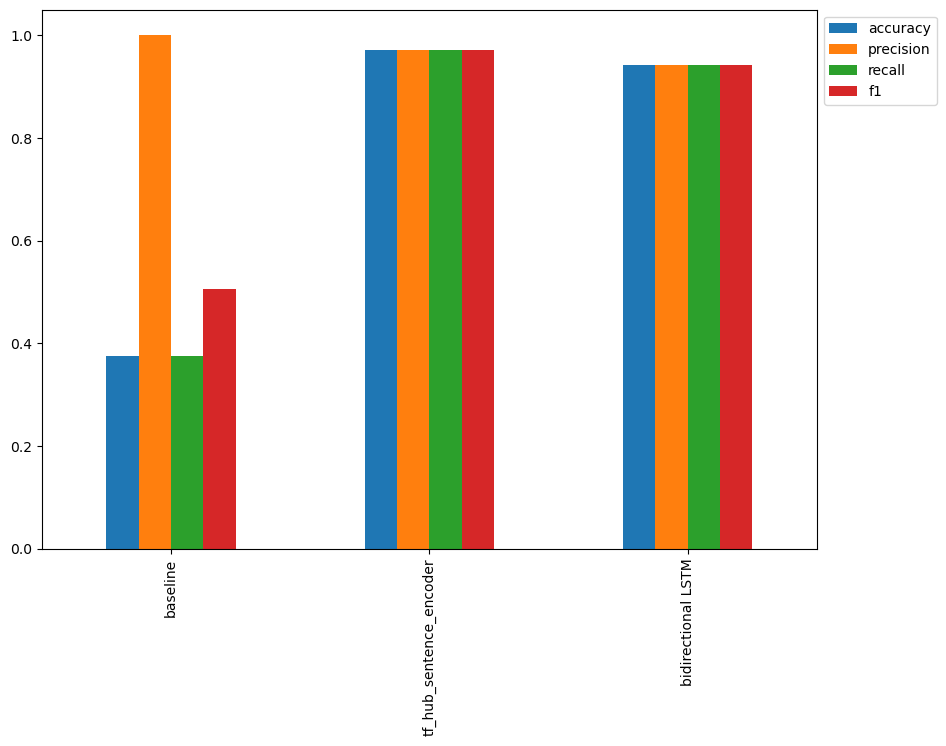

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

Then, the model results are sorted by the F1-score and plotted in a bar plot to compare the performance of different models.

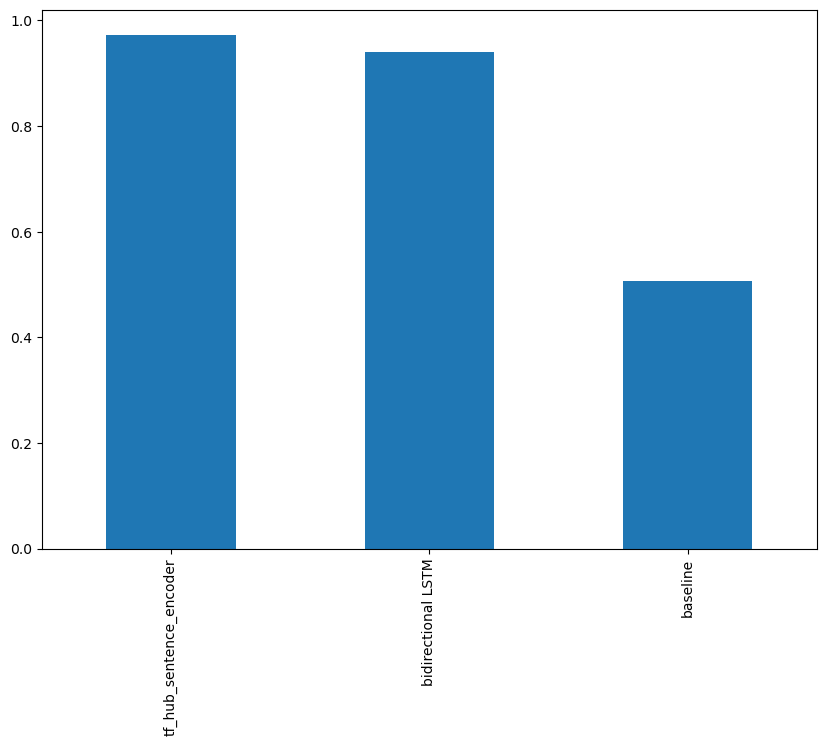

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

**Ensemble Models**

Ensemble methods are a cornerstone of machine learning where multiple models are trained and their predictions are combined, typically leading to a more robust and accurate result compared to a single model. They reduce both bias and variance, provide a way to handle large datasets, and improve generalizability and robustness over a single estimator.

In this project, an ensemble of two models (LSTM and USE) is created. The prediction probabilities of these models are added together and the average is calculated (by dividing by 2). The class (label) with the highest mean probability is then selected as the final ensemble prediction. This effectively votes on the most likely class based on the individual model's predictions, hence capitalizing on their collective learning.

In [ ]:
baseline_pred_probs.shape

(5, 2)

In [ ]:
# Get mean pred probs for 2 models
combined_pred_probs = model_USE_pred_probs + model_lstm_pred_probs
combined_preds = tf.argmax(combined_pred_probs/2, axis=1) # average and get class with highest probability
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([2, 0, 2, 2, 1, 1, 4, 2, 3, 3, 0, 2, 4, 1, 0, 3, 0, 3, 4, 0])>

The following code evaluates the ensemble model's performance, adds these results to a DataFrame for comparison with other models, and plots the F1 scores of all models. The code evaluates the ensemble model's performance, adds these results to a DataFrame for comparison with other models, and plots the F1 scores of all models.

In [ ]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(y_valid_le, combined_preds)
ensemble_results

{'accuracy': 95.77464788732394,
 'precision': 0.9584593028481853,
 'recall': 0.9577464788732394,
 'f1': 0.9578341183481681}

In [ ]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [ ]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.375587,1.000000,0.375587,0.505822
tf_hub_sentence_encoder,0.971831,0.972361,0.971831,0.971922
bidirectional LSTM,0.941315,0.942403,0.941315,0.941219
ensemble_results,0.957746,0.958459,0.957746,0.957834


The ensemble model demonstrates its power by achieving an accuracy of 95.77%. It outperforms the baseline model and approaches the performance of the individual models, surpassing the bidirectional LSTM model but slightly below the TensorFlow Hub sentence encoder model. The precision, recall, and F1 scores of the ensemble model also indicate its effectiveness in combining the strengths of the individual models. The ensemble approach leverages the collective knowledge and predictive capabilities of the LSTM and USE models, resulting in improved overall performance.